In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [164]:
def midpoint_method(x_0, N, T, f, params, k = 1):

    Del = T / N
    A = [x_0.copy()]
    
    t = 0

    for i in range(N * k):
        
        k_t = x_0 + Del / 2 * f(t, x_0, params)
        x_0 += Del * f(t + Del / 2, k_t, params)
        A.append(x_0.copy())
        
        t += Del

    return A


In [165]:
def f_pm(t, x, params):
    
    x_1 = x[0]
    x_2 = x[1]
    
    if x_2 > 0: return np.array([-1 + x_2, x_2 - x_1])
    elif x_2 < 0: return np.array([-1 - x_2, x_2 + x_1])
    
    return np.array([0,0])
    

In [166]:
def f_pm_lc(t, x, params):
    
    a = params[0]
    return a * f_p(t, x, params) + (1 - a) * f_m(t, x, params)

In [167]:
def f_p(t, x, params):
     
    return np.array([-1 + x[1], x[1] - x[0]])
    

In [168]:
def f_m(t, x, params):
    
    return np.array([-1 - x[1], x[1] + x[0]])


In [169]:
A_p = []
A_m = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_p.append(midpoint_method(x_0.copy(), 100, 1, f_p, [], k=10))
        A_p.append(midpoint_method(x_0.copy(), 100, -1, f_p, [], k=10))
        A_m.append(midpoint_method(x_0.copy(), 100, 1, f_m, [], k=10))
        A_m.append(midpoint_method(x_0.copy(), 100, -1, f_m, [], k=10))
        

Text(0, 0.5, 'x_2')

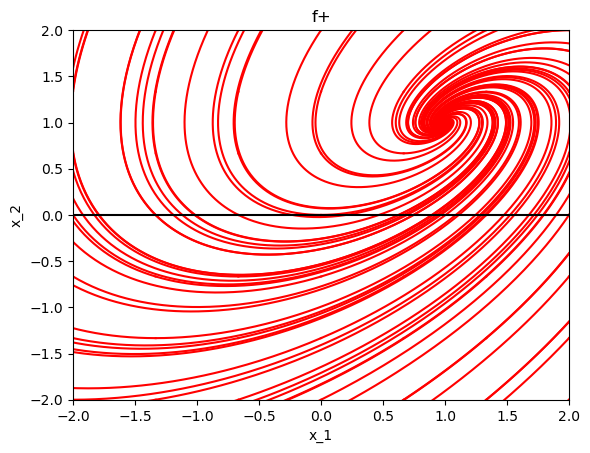

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_p)):

    df = pd.DataFrame(A_p[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")
    
ax.plot(np.array([i for i in range(-2, 3)]), np.zeros(5), color = "black")

ax.set_title('f+')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

Text(0, 0.5, 'x_2')

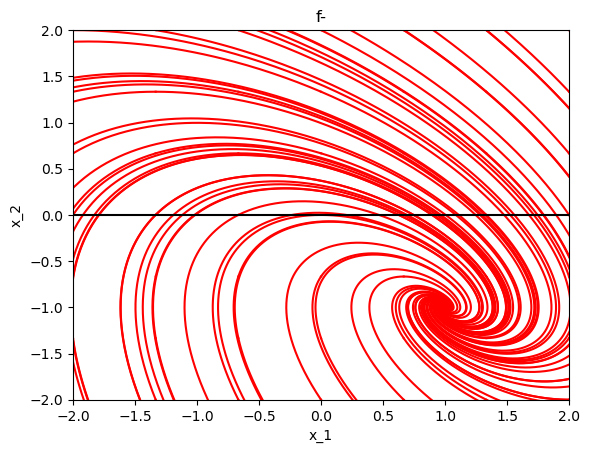

In [174]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_m)):

    df = pd.DataFrame(A_m[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")
    
ax.plot(np.array([i for i in range(-2, 3)]), np.zeros(5), color = "black")

ax.set_title('f-')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [216]:
x_0 = np.array([2.0, 1.0])
        
A_pm_lc_0 = midpoint_method(x_0.copy(), 100, 1, f_pm_lc, [0], k=3)
A_pm_lc_12 = midpoint_method(x_0.copy(), 100, 1, f_pm_lc, [0.5], k=3)
A_pm_lc_1 = midpoint_method(x_0.copy(), 100, 1, f_pm_lc, [1], k=3)
A_pm_lc_49 = midpoint_method(x_0.copy(), 100, 1, f_pm_lc, [0.49], k=3)

In [217]:
df = pd.DataFrame(A_pm_lc_0)
df1 = pd.DataFrame(A_pm_lc_12)
df2 = pd.DataFrame(A_pm_lc_1)
df3 = pd.DataFrame(A_pm_lc_49)

df.columns = ['x_1','x_2']
df1.columns = ['x_1','x_2']
df2.columns = ['x_1','x_2']
df3.columns = ['x_1','x_2']


Text(0, 0.5, 'x_2')

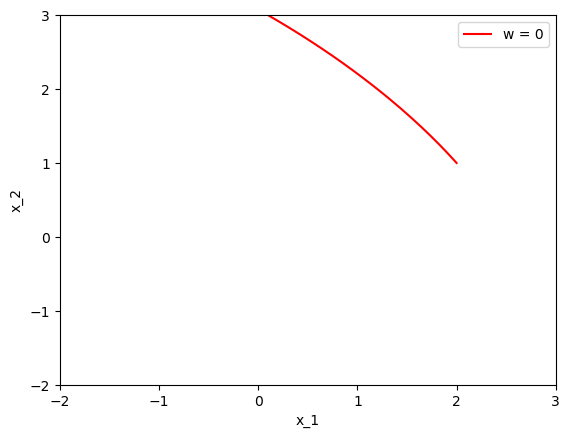

In [228]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['x_1'], df['x_2'], color = "red", label = "w = 0")

ax.legend()
ax.set_xlim([-2,3])
ax.set_ylim([-2,3])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

Text(0, 0.5, 'x_2')

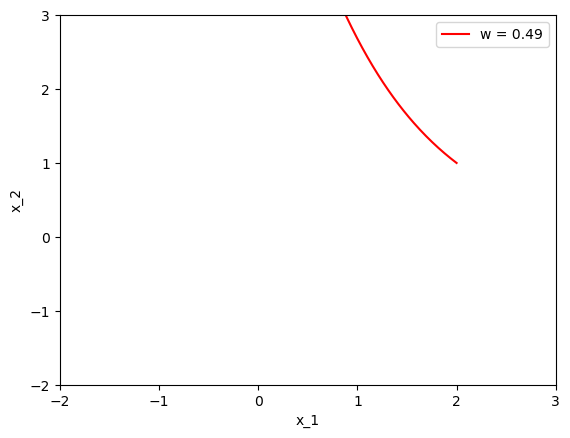

In [229]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df3['x_1'], df3['x_2'], color = "red", label = "w = 0.49")

ax.legend()
ax.set_xlim([-2,3])
ax.set_ylim([-2,3])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

Text(0, 0.5, 'x_2')

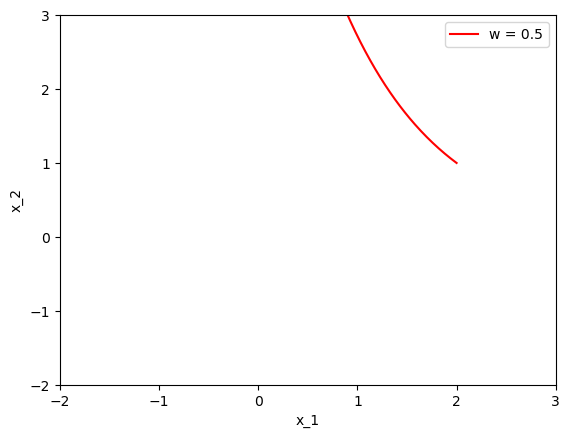

In [230]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df1['x_1'], df1['x_2'], color = "red", label = "w = 0.5")

ax.legend()
ax.set_xlim([-2,3])
ax.set_ylim([-2,3])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

Text(0, 0.5, 'x_2')

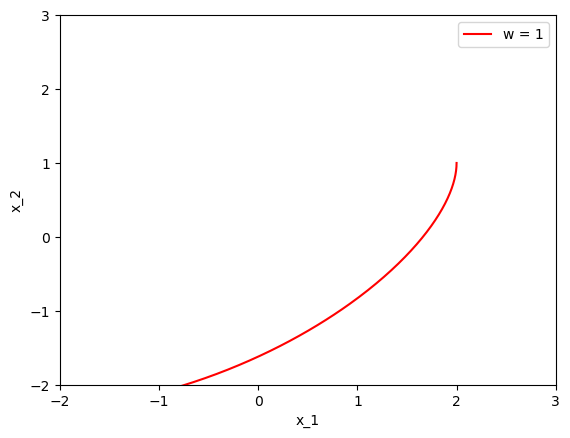

In [231]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df2['x_1'], df2['x_2'], color = "red", label = "w = 1")

ax.legend()
ax.set_xlim([-2,3])
ax.set_ylim([-2,3])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [227]:
x_0 = np.array([0.5, 0.5])
        
A_pm = midpoint_method(x_0.copy(), 1000, 1, f_pm, [0], k=1)

In [78]:
df = pd.DataFrame(A_pm)
df.columns = ['x_1','x_2']

Text(0, 0.5, 'x_2')

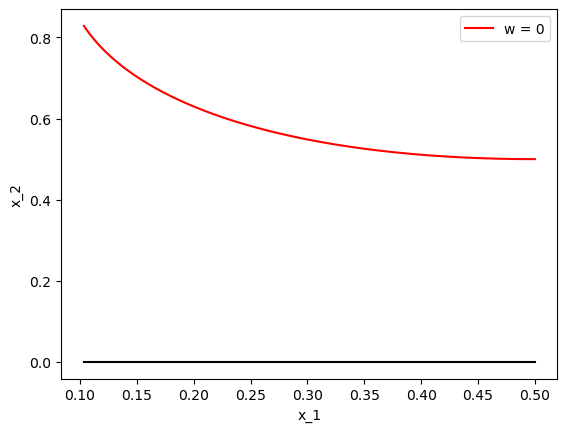

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['x_1'], df['x_2'], color = "red", label = "w = 0")
ax.plot(df['x_1'], np.zeros(len(df['x_1'])), color = "black")

ax.legend()
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [176]:
x_0 = np.array([2.0, 2.0])
        
A_pm = midpoint_method(x_0.copy(), 1000, 1, f_pm, [0], k=3)

In [177]:
df = pd.DataFrame(A_pm)
df.columns = ['x_1','x_2']

Text(0, 0.5, 'x_2')

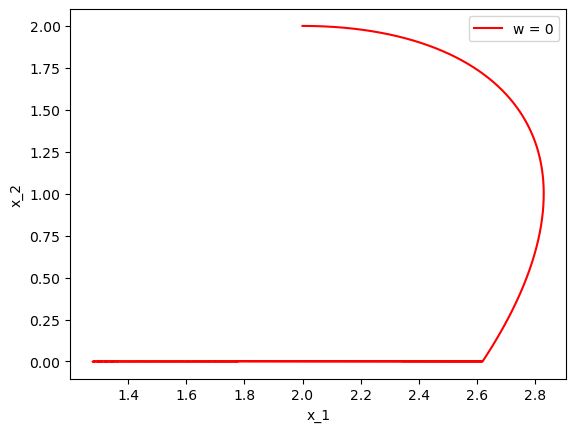

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(df['x_1'], df['x_2'], color = "red", label = "w = 0")
# ax.plot(df['x_1'], np.zeros(len(df['x_1'])), color = "black")

ax.legend()
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [198]:
A_pm = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm.append(midpoint_method(x_0.copy(), 20, 1, f_pm, [], k=10))
        A_pm.append(midpoint_method(x_0.copy(), 20, -1, f_pm, [], k=10))
        

Text(0, 0.5, 'x_2')

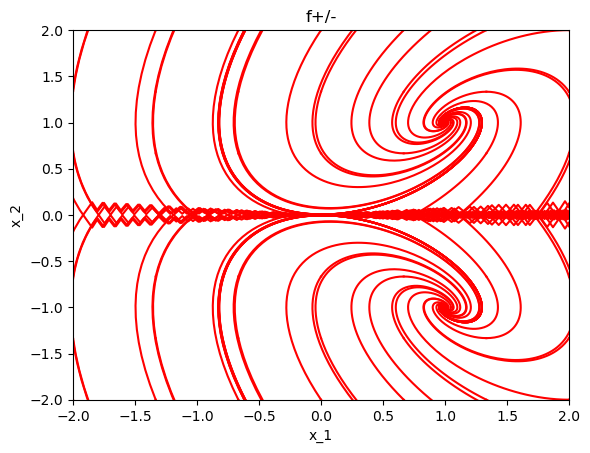

In [199]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm)):

    df = pd.DataFrame(A_pm[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/-')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

Text(0, 0.5, 'x_2')

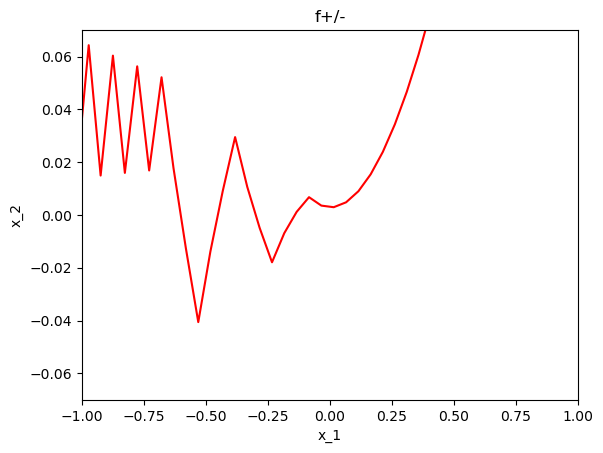

In [204]:
fig = plt.figure()
ax = fig.add_subplot(111)

df = pd.DataFrame(A_pm[5])

df.columns = ['x_1','x_2']

ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/-')
ax.set_xlim([-1,1])
ax.set_ylim([-0.07,0.07])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [152]:
def f_pm_lc_ep(t, x, params):
    
    ep = params[0]
    if x[1] > ep: return f_p(t, x, params)
    elif x[1] < -1 * ep: return f_m(t, x, params)
    else:
        a = (x[1] + ep) / (2 * ep)
        return a * f_p(t, x, []) + (1 - a) * f_m(t, x, [])
    

In [181]:
A_pm_ep = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, 1, f_pm_lc_ep, [0.01, 1], k=20))
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, -1, f_pm_lc_ep, [0.01, 1], k=20))
        

Text(0, 0.5, 'x_2')

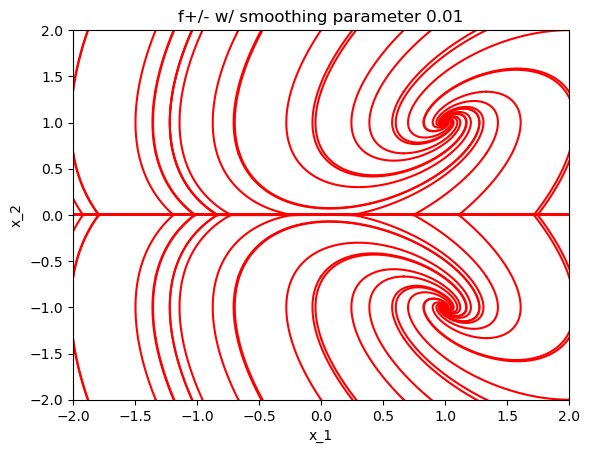

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm_ep)):

    df = pd.DataFrame(A_pm_ep[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/- w/ smoothing parameter 0.01')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [179]:
A_pm_ep = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, 1, f_pm_lc_ep, [0.1, 1], k=20))
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, -1, f_pm_lc_ep, [0.1, 1], k=20))
        

Text(0, 0.5, 'x_2')

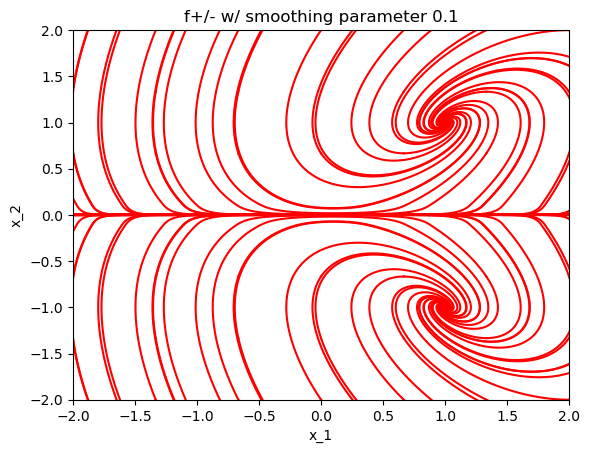

In [180]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm_ep)):

    df = pd.DataFrame(A_pm_ep[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/- w/ smoothing parameter 0.1')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [183]:
A_pm_ep = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, 1, f_pm_lc_ep, [0.5, 1], k=20))
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, -1, f_pm_lc_ep, [0.5, 1], k=20))
        

Text(0, 0.5, 'x_2')

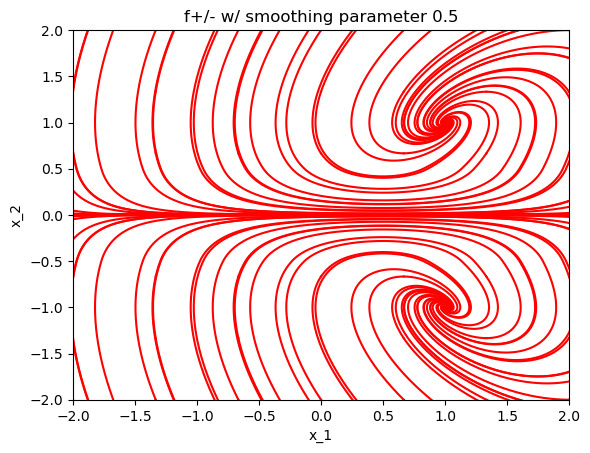

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm_ep)):

    df = pd.DataFrame(A_pm_ep[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/- w/ smoothing parameter 0.5')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [155]:
A_pm_ep = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, 1, f_pm_lc_ep, [0.5, 10], k=20))
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, -1, f_pm_lc_ep, [0.5, 10], k=20))
        

Text(0, 0.5, 'x_2')

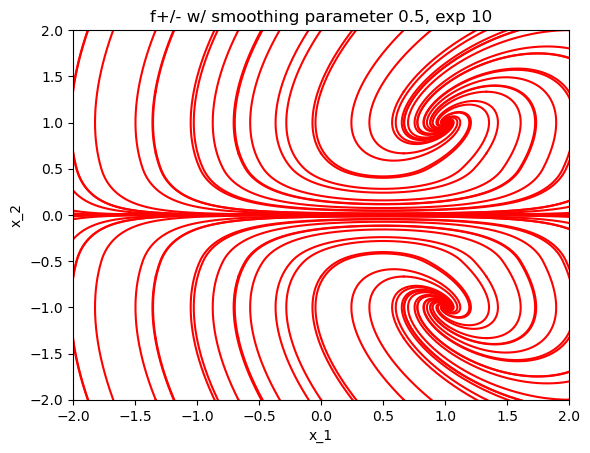

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm_ep)):

    df = pd.DataFrame(A_pm_ep[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/- w/ smoothing parameter 0.5')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [157]:
A_pm_ep = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, 1, f_pm_lc_ep, [0.5, 100], k=20))
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, -1, f_pm_lc_ep, [0.5, 100], k=20))
        

Text(0, 0.5, 'x_2')

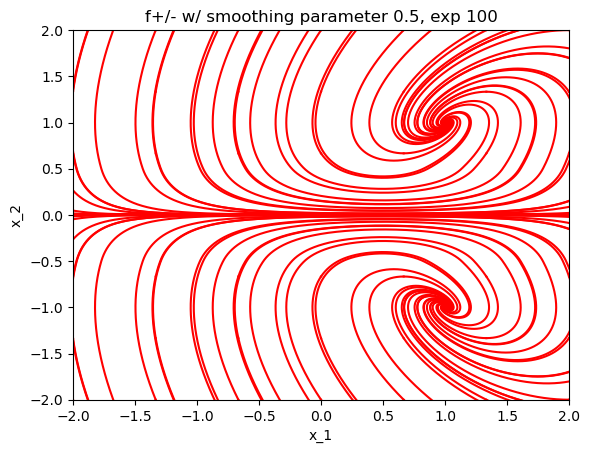

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm_ep)):

    df = pd.DataFrame(A_pm_ep[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/- w/ smoothing parameter 0.5')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [159]:
A_pm_ep = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, 1, f_pm_lc_ep, [0.5, 10000], k=20))
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, -1, f_pm_lc_ep, [0.5, 10000], k=20))
        

Text(0, 0.5, 'x_2')

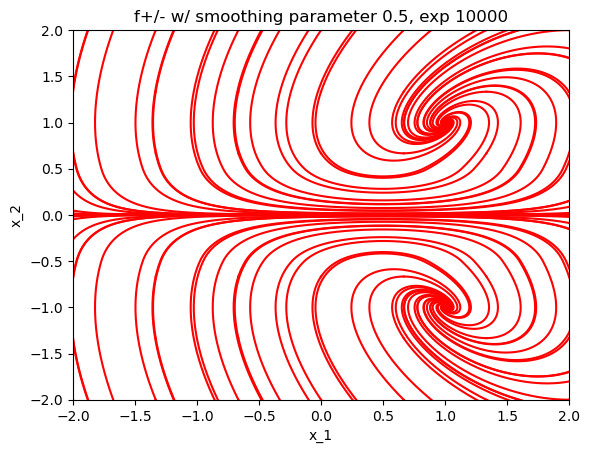

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm_ep)):

    df = pd.DataFrame(A_pm_ep[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/- w/ smoothing parameter 0.5')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [161]:
A_pm_ep = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, 1, f_pm_lc_ep, [0.5, 1/10000], k=20))
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, -1, f_pm_lc_ep, [0.5, 1/10000], k=20))
        

Text(0, 0.5, 'x_2')

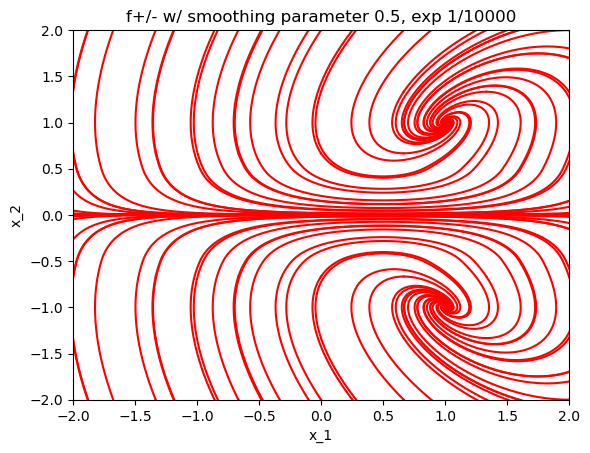

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm_ep)):

    df = pd.DataFrame(A_pm_ep[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/- w/ smoothing parameter 0.5, exp 1/10000')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [107]:
A_pm_ep = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, 1, f_pm_lc_ep, [0.1], k=20))
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, -1, f_pm_lc_ep, [0.1], k=20))
        

Text(0, 0.5, 'x_2')

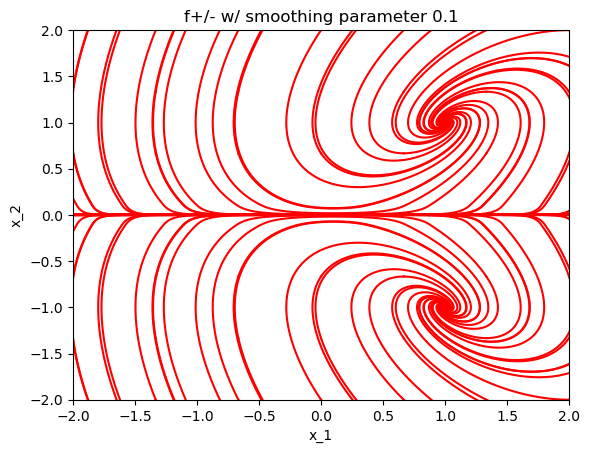

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm_ep)):

    df = pd.DataFrame(A_pm_ep[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/- w/ smoothing parameter 0.1')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')

In [109]:
A_pm_ep = []

for x_1 in range(-3, 4):
    for x_2 in range(-3, 4):
        x_0 = np.array([float(x_1 / 1.5), float(x_2 / 1.5)])
        
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, 1, f_pm_lc_ep, [1.0], k=20))
        A_pm_ep.append(midpoint_method(x_0.copy(), 1000, -1, f_pm_lc_ep, [1.0], k=20))
        

Text(0, 0.5, 'x_2')

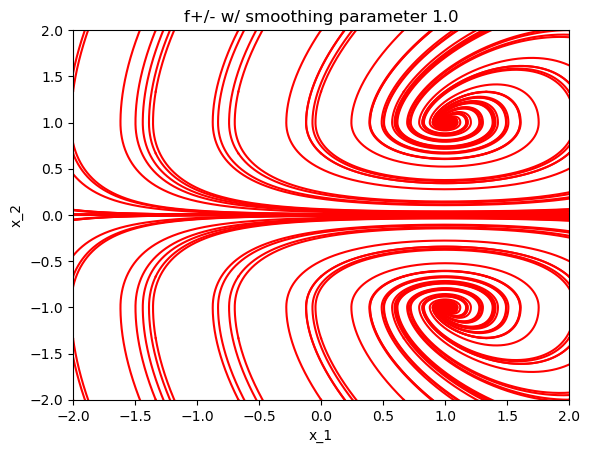

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(len(A_pm_ep)):

    df = pd.DataFrame(A_pm_ep[i])

    df.columns = ['x_1','x_2']

    ax.plot(df['x_1'], df['x_2'], color = "red")

ax.set_title('f+/- w/ smoothing parameter 1.0')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
